In [1]:
import JoshLearnsHowToLearn as jll
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt
import random

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

C:\Users\caojo\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\caojo\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\caojo\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\caojo\AppData\Roaming\Python\Python36\site-

# Data

In [3]:
data = np.genfromtxt("data/train_small.csv", delimiter=",", skip_header=1, dtype=float)
# data = data[:50]
# data = np.genfromtxt("data/generated_dataset.csv", delimiter=",", skip_header=1, dtype=float)
print(data.shape)

(999, 785)


In [4]:
X = data[:,1:]
X = X.reshape((X.shape[0],28,28,1))
Y = data[:,0]

print(X.shape)
print(Y.shape)

(999, 28, 28, 1)
(999,)


### normalize

In [5]:
X /= np.max(X)
print(X.shape)

(999, 28, 28, 1)


### one-hot encoding

In [6]:
Y = Y.astype(dtype=int)
tempY = np.zeros(shape=(len(Y), np.max(Y)+1))
tempY[np.arange(len(Y)),Y] = 1
Y = tempY
print(Y.shape)

(999, 10)


### train/validation split

In [7]:
Xtr, Xva, Ytr, Yva = model_selection.train_test_split(X, Y, train_size=.80, random_state=0)

print(Xtr.shape)
print(Ytr.shape)

(799, 28, 28, 1)
(799, 10)


C:\Users\caojo\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Building the model

In [8]:
model = jll.NeuralNetwork.NeuralNetwork(input_shape = Xtr.shape[1:], lr=0.01, loss=jll.LossFunction.CrossEntropy())
model.add_layer(jll.Layer.ConvolutionalLayer, filter_size = (2,2), num_filters = 8)
model.add_layer(jll.Layer.Relu)
model.add_layer(jll.Layer.ConvolutionalLayer, filter_size = (2,2), num_filters = 4)
model.add_layer(jll.Layer.Relu)
model.add_layer(jll.Layer.FlattenLayer)
model.add_layer(jll.Layer.FullyConnectedLayer, num_neurons = 16)
model.add_layer(jll.Layer.Relu)
model.add_layer(jll.Layer.FullyConnectedLayer, num_neurons = 10)
model.add_layer(jll.Layer.Softmax)

In [9]:
model.train(Xtr, Ytr, Xva, Yva, epochs=20, batch_size=32)

epoch # 0 :
	Training Accuracy:  0.37296620775969963
	Validation Accuracy:  0.365
	Training loss:  1.7776297895960174
	validation loss:  1.7922098226917211
epoch # 1 :
	Training Accuracy:  0.6057571964956195
	Validation Accuracy:  0.62
	Training loss:  1.2946964192908814
	validation loss:  1.2847141440579495
epoch # 2 :
	Training Accuracy:  0.655819774718398
	Validation Accuracy:  0.74
	Training loss:  1.1494335749270748
	validation loss:  1.0890295950719746
epoch # 3 :
	Training Accuracy:  0.7221526908635795
	Validation Accuracy:  0.71
	Training loss:  1.0286740202524398
	validation loss:  1.0393365234139285
epoch # 4 :
	Training Accuracy:  0.7797246558197747
	Validation Accuracy:  0.795
	Training loss:  0.893380785958714
	validation loss:  0.8840483108080344
epoch # 5 :
	Training Accuracy:  0.7872340425531915
	Validation Accuracy:  0.79
	Training loss:  0.8772316513960324
	validation loss:  0.8574749207051734
epoch # 6 :
	Training Accuracy:  0.7259073842302879
	Validation Accuracy:  

In [10]:
predict_va = model.predict(Xva)

Predicting 2 with 0.9969006191697893 confidence


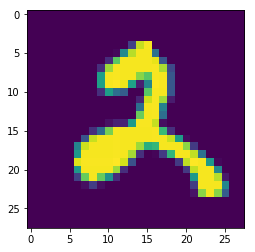

In [11]:
num = random.randint(0, len(Xva))
plt.imshow(np.reshape(Xva[num], (28,28)))
p = predict_va[num]
max_index = np.argmax(p)
print ("Predicting", max_index, "with", p[max_index], "confidence")

# Tensorflow Comparison

In [16]:
tf_model = tf.keras.models.Sequential()
tf_model.add(tf.layers.Conv2D(8, (2, 2), input_shape=(28, 28, 1),  activation=tf.nn.relu))
tf_model.add(tf.layers.Conv2D(4, (2, 2),  activation=tf.nn.relu))
tf_model.add(tf.layers.Flatten())
tf_model.add(tf.keras.layers.Dense(16, activation='relu'))
tf_model.add(tf.keras.layers.Dense(10, activation='softmax'))

tf_model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
                 loss = tf.keras.losses.categorical_crossentropy,
                 metrics=['accuracy'])

In [17]:
tf_model.fit(Xtr, Ytr, validation_data=(Xva, Yva), epochs = 20, batch_size = 32)

Train on 799 samples, validate on 200 samples
Epoch 1/20
799/799 [==============================] - 1s 967us/step - loss: 2.3200 - acc: 0.1089 - val_loss: 2.2991 - val_acc: 0.1500
Epoch 2/20
799/799 [==============================] - 0s 243us/step - loss: 2.2685 - acc: 0.1977 - val_loss: 2.2436 - val_acc: 0.2150
Epoch 3/20
799/799 [==============================] - 0s 220us/step - loss: 2.1974 - acc: 0.2753 - val_loss: 2.1434 - val_acc: 0.2950
Epoch 4/20
799/799 [==============================] - 0s 219us/step - loss: 2.0471 - acc: 0.3717 - val_loss: 1.9571 - val_acc: 0.4350
Epoch 5/20
799/799 [==============================] - 0s 231us/step - loss: 1.7907 - acc: 0.5344 - val_loss: 1.6344 - val_acc: 0.5400
Epoch 6/20
799/799 [==============================] - 0s 227us/step - loss: 1.4243 - acc: 0.6358 - val_loss: 1.2548 - val_acc: 0.6550
Epoch 7/20
799/799 [==============================] - 0s 231us/step - loss: 1.0806 - acc: 0.7159 - val_loss: 0.8320 - val_acc: 0.8000
Epoch 8/20
799/7

In [18]:
tf_predict_va = tf_model.predict(Xva)

Predicting 6 with 0.98931944 confidence


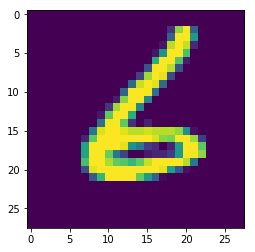

In [19]:
num = random.randint(0, len(Xva))
plt.imshow(np.reshape(Xva[num], (28,28)))
p = tf_predict_va[num]
max_index = np.argmax(p)
print ("Predicting", max_index, "with", p[max_index], "confidence")